In [1]:
!apt-get update
!apt-get install -y sox libsox-fmt-all libsox-dev


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease                                              
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [70.9 kB]                 
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]              
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]        
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,824 kB]                      
Get:1

#Raw Audio Analysis

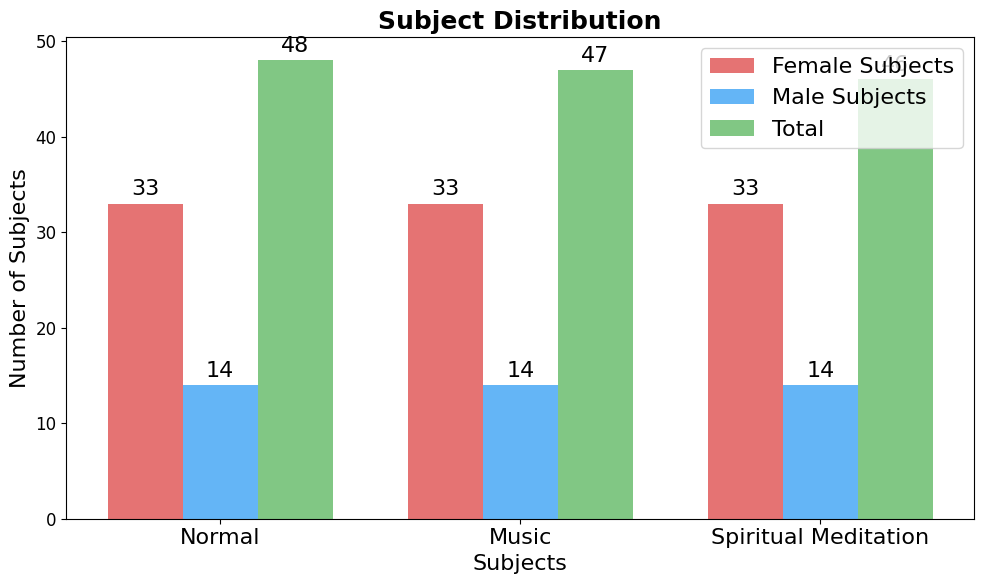

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Set global font to Times New Roman.
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.size"] = 12

# Data based on your table.
subjects = ["Normal", "Music", "Spiritual Meditation"]
female_counts = np.array([33, 33, 33])
male_counts   = np.array([14, 14, 14])
total_counts  = np.array([48, 47, 46])

# Define colors for each category.
color_female = "#E57373"   # A softer red
color_male   = "#64B5F6"   # A softer blue
color_total  = "#81C784"   # A softer green

# Positions for groups.
x = np.arange(len(subjects))
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

bars_female = ax.bar(x - width, female_counts, width, label="Female Subjects", color=color_female)
bars_male   = ax.bar(x, male_counts, width, label="Male Subjects", color=color_male)
bars_total  = ax.bar(x + width, total_counts, width, label="Total", color=color_total)

# Set axis labels and title with font size 16.
ax.set_xlabel("Subjects", fontsize=16)
ax.set_ylabel("Number of Subjects", fontsize=16)
ax.set_title("Subject Distribution", fontsize=18, fontweight='bold')

# Set tick labels font size to 16.
ax.set_xticks(x)
ax.set_xticklabels(subjects, fontsize=16)

# Set legend font size to 16.
ax.legend(fontsize=16)

# Add value labels on top of each bar.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=16)

autolabel(bars_female)
autolabel(bars_male)
autolabel(bars_total)

plt.tight_layout()
plt.savefig("subject_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


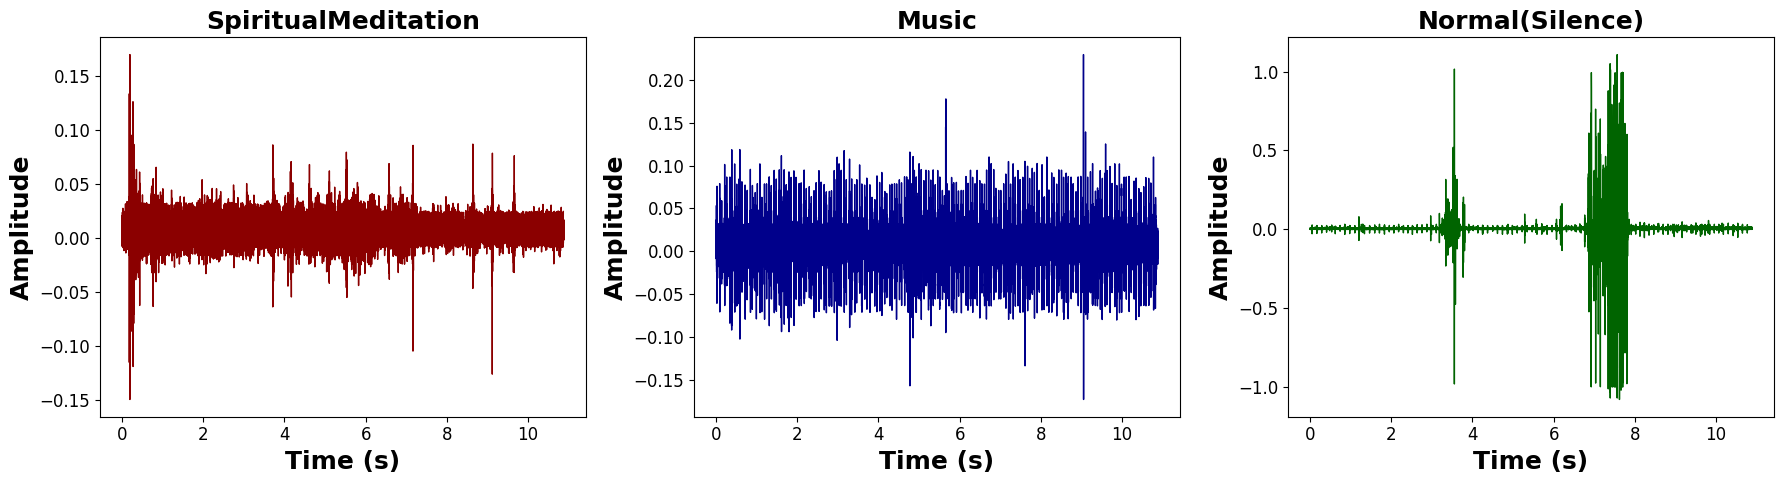

In [19]:
import os
import random
import glob
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

# Global settings: Times New Roman.
mpl.rcParams["font.family"] = "Times New Roman"

# Define colors for each class.
class_colors = {
    "SpiritualMeditation": "#8B0000",   # Dark Red
    "Music": "#00008B",                # Dark Blue
    "Normal(Silence)": "#006400"       # Dark Green
}

# Define dataset class.
class RawAudioDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, sample_rate=16000):
        self.sample_rate = sample_rate
        # Expected folder names:
        self.classes = ["SpiritualMeditation", "Music", "Normal(Silence)"]
        self.file_paths = []
        self.labels = []
        for cls in self.classes:
            folder = Path(root_dir) / cls
            wav_files = glob.glob(str(folder / '*.wav'))
            if wav_files:
                self.file_paths.extend(wav_files)
                self.labels.extend([cls] * len(wav_files))
            else:
                print(f"Warning: No files found for {cls} in {folder}")
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        file_path = self.file_paths[idx]
        waveform, sr = torchaudio.load(file_path)
        if sr != self.sample_rate:
            waveform = torchaudio.transforms.Resample(sr, self.sample_rate)(waveform)
        if waveform.dim() == 2:
            waveform = waveform[0].unsqueeze(0)
        label = self.labels[idx]
        return waveform, label

# Main script.
def main():
    root_dir = "/kaggle/input/qmsat-dataset/ATS-data"  # Adjust if needed
    sample_rate = 16000
    dataset = RawAudioDataset(root_dir, sample_rate=sample_rate)
    
    # Create a figure with 1 row and 3 columns.
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    classes = ["SpiritualMeditation", "Music", "Normal(Silence)"]
    
    for i, cls in enumerate(classes):
        # Get indices for this class.
        indices = [j for j, lab in enumerate(dataset.labels) if lab == cls]
        if not indices:
            continue
        sample_idx = random.choice(indices)
        waveform, label = dataset[sample_idx]
        data = waveform.numpy().flatten()
        t = np.linspace(0, len(data)/sample_rate, len(data))
        
        axs[i].plot(t, data, color=class_colors[cls], linewidth=1, label=cls)
        axs[i].set_title(cls, fontsize=18, fontweight='bold')  # Updated title with bold and size 18
        axs[i].set_xlabel("Time (s)", fontsize=18, fontweight='bold')  # Updated font size for x-axis label
        axs[i].set_ylabel("Amplitude", fontsize=18, fontweight='bold')  # Updated font size for y-axis label
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/all_classes_audio.jpeg", dpi=300, bbox_inches="tight")
    plt.show()


if __name__ == "__main__":
    main()


<ipython-input-17-45ebc93aafb6>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_new['Date'] = df_cleaned_new['Date'].dt.date  # Remove the time component
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


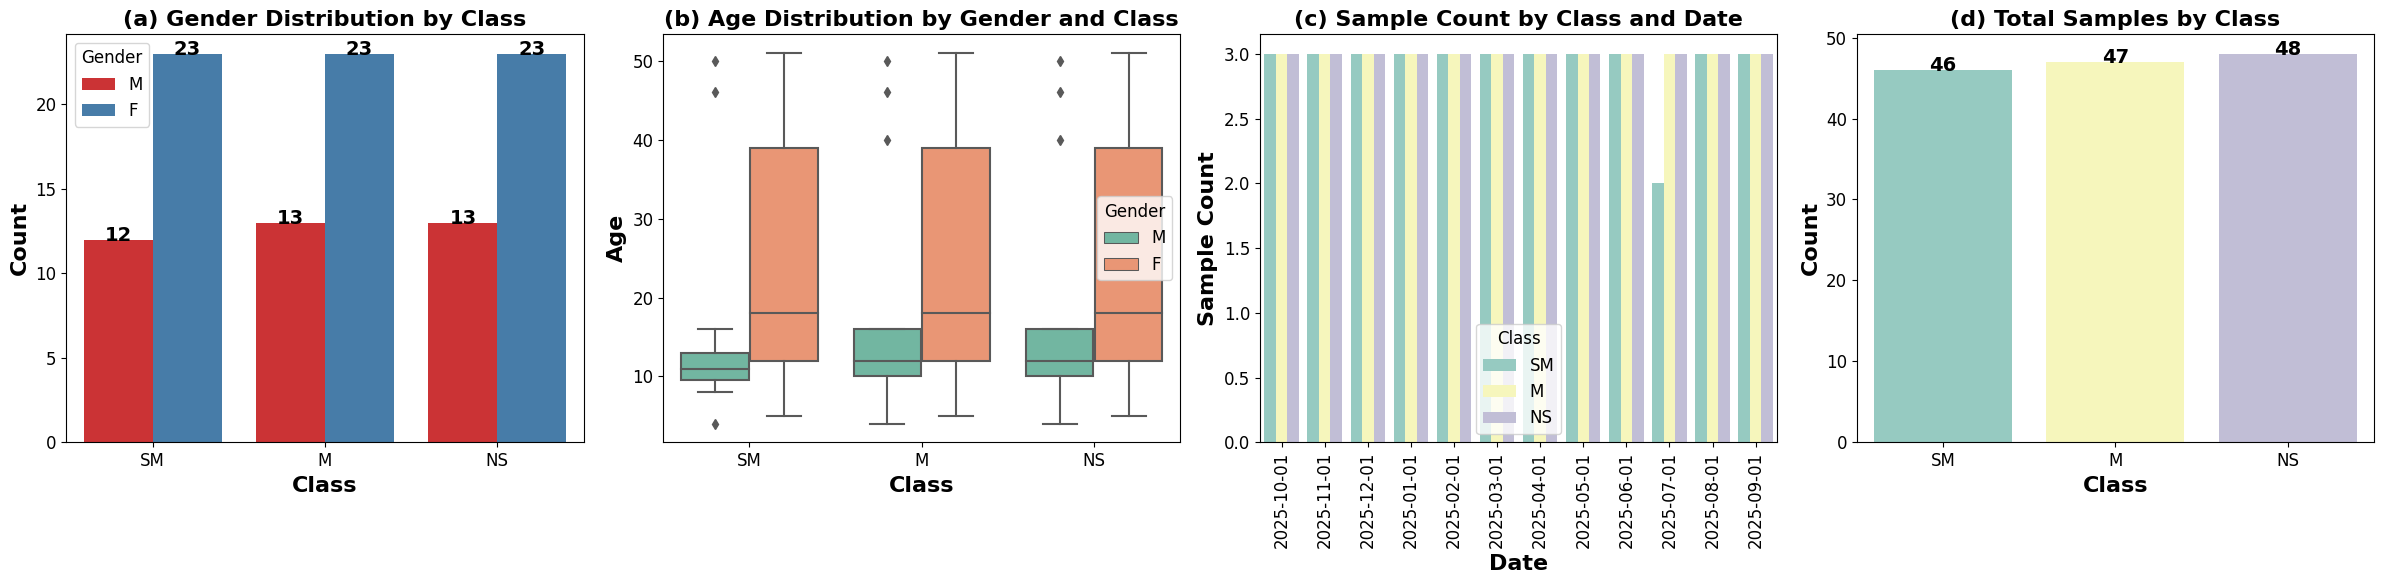

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
file_path_new = '/kaggle/input/qmsat-dataset/SMSAT-dataset-info.xlsx'
df_new = pd.read_excel(file_path_new)

# Clean up the dataset
df_new['Gender'] = df_new['Gender'].map({'M': 'M', 'F': 'F'})  # Map Gender M->'M', F->'F'
df_new['Date'] = pd.to_datetime(df_new['Date'], errors='coerce')  # Ensure the date column is in datetime format
df_cleaned_new = df_new.dropna(subset=['Date'])  # Drop rows with invalid dates

# Create the 1x4 subplot
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# (a) Gender distribution for each class
sns.countplot(x='Class', hue='Gender', data=df_cleaned_new, ax=axs[0], palette='Set1')
axs[0].set_title("(a) Gender Distribution by Class", fontsize=16, fontweight='bold')
axs[0].set_xlabel("Class", fontsize=16, fontweight='bold')
axs[0].set_ylabel("Count", fontsize=16, fontweight='bold')
# Add sample count on top of bars as integer values (no floating point)
for p in axs[0].patches:
    axs[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 3), textcoords='offset points')

# (b) Age distribution for male and female subjects, by class
sns.boxplot(x='Class', y='Age', hue='Gender', data=df_cleaned_new, ax=axs[1], palette='Set2')
axs[1].set_title("(b) Age Distribution by Gender and Class", fontsize=16, fontweight='bold')
axs[1].set_xlabel("Class", fontsize=16, fontweight='bold')
axs[1].set_ylabel("Age", fontsize=16, fontweight='bold')

# (c) Sample count per day for each class (removing time from Date)
df_cleaned_new['Date'] = df_cleaned_new['Date'].dt.date  # Remove the time component
sns.countplot(x='Date', hue='Class', data=df_cleaned_new, ax=axs[2], palette='Set3')
axs[2].set_title("(c) Sample Count by Class and Date", fontsize=16, fontweight='bold')
axs[2].set_xlabel("Date", fontsize=16, fontweight='bold')
axs[2].set_ylabel("Sample Count", fontsize=16, fontweight='bold')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

# No need to add values to the (c) plot

# (d) Total samples by class with manual counts (SM = 46, M = 47, NS = 48)
class_names = ['SM', 'M', 'NS']
sample_counts = [46, 47, 48]  # Fixed sample counts as per user request

sns.barplot(x=class_names, y=sample_counts, ax=axs[3], palette='Set3')
for p in axs[3].patches:
    axs[3].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 3), textcoords='offset points')
axs[3].set_title("(d) Total Samples by Class", fontsize=16, fontweight='bold')
axs[3].set_xlabel("Class", fontsize=16, fontweight='bold')
axs[3].set_ylabel("Count", fontsize=16, fontweight='bold')

# Adjust layout and save the figure as .jpeg
plt.tight_layout()
plt.savefig("/kaggle/working/sample_distribution_plots_final.jpeg", dpi=300, bbox_inches="tight")
plt.show()


<ipython-input-24-65c9e09046a2>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_new['Date'] = df_cleaned_new['Date'].dt.date  # Remove the time component
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


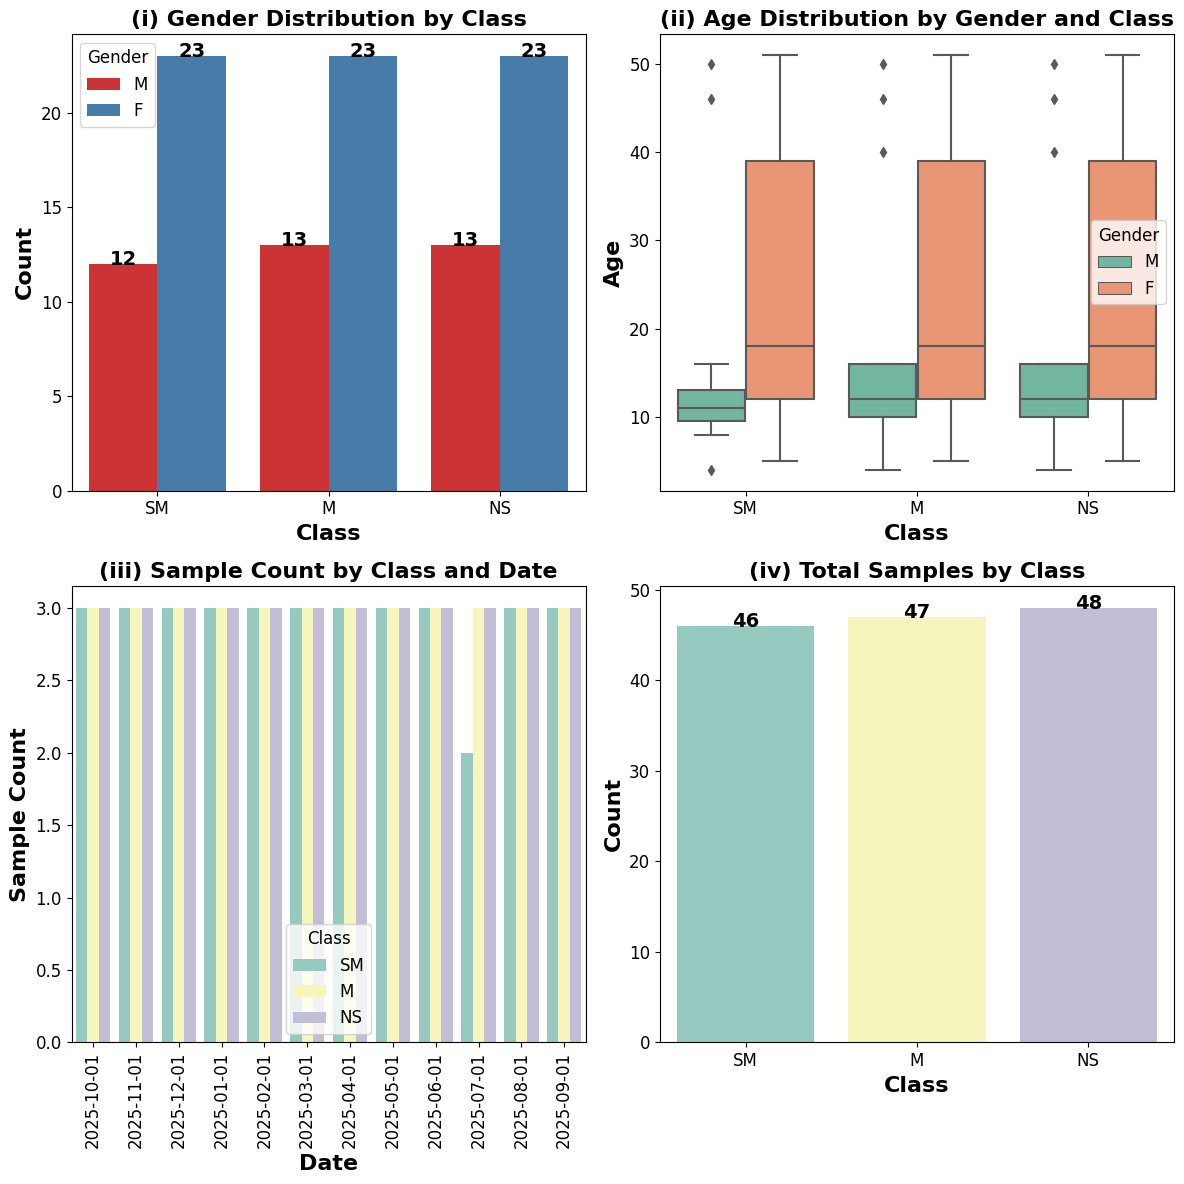

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
file_path_new = '/kaggle/input/qmsat-dataset/SMSAT-dataset-info.xlsx'
df_new = pd.read_excel(file_path_new)

# Clean up the dataset
df_new['Gender'] = df_new['Gender'].map({'M': 'M', 'F': 'F'})  # Map Gender M->'M', F->'F'
df_new['Date'] = pd.to_datetime(df_new['Date'], errors='coerce')  # Ensure the date column is in datetime format
df_cleaned_new = df_new.dropna(subset=['Date'])  # Drop rows with invalid dates

# Create the 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# (i) Gender distribution for each class
sns.countplot(x='Class', hue='Gender', data=df_cleaned_new, ax=axs[0, 0], palette='Set1')
axs[0, 0].set_title("(i) Gender Distribution by Class", fontsize=16, fontweight='bold')
axs[0, 0].set_xlabel("Class", fontsize=16, fontweight='bold')
axs[0, 0].set_ylabel("Count", fontsize=16, fontweight='bold')
# Add sample count on top of bars as integer values (no floating point)
for p in axs[0, 0].patches:
    axs[0, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 3), textcoords='offset points')

# (ii) Age distribution for male and female subjects, by class
sns.boxplot(x='Class', y='Age', hue='Gender', data=df_cleaned_new, ax=axs[0, 1], palette='Set2')
axs[0, 1].set_title("(ii) Age Distribution by Gender and Class", fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel("Class", fontsize=16, fontweight='bold')
axs[0, 1].set_ylabel("Age", fontsize=16, fontweight='bold')

# (iii) Sample count per day for each class (removing time from Date)
df_cleaned_new['Date'] = df_cleaned_new['Date'].dt.date  # Remove the time component
sns.countplot(x='Date', hue='Class', data=df_cleaned_new, ax=axs[1, 0], palette='Set3')
axs[1, 0].set_title("(iii) Sample Count by Class and Date", fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel("Date", fontsize=16, fontweight='bold')
axs[1, 0].set_ylabel("Sample Count", fontsize=16, fontweight='bold')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)

# (iv) Total samples by class with manual counts (SM = 46, M = 47, NS = 48)
class_names = ['SM', 'M', 'NS']
sample_counts = [46, 47, 48]  # Fixed sample counts as per user request

sns.barplot(x=class_names, y=sample_counts, ax=axs[1, 1], palette='Set3')
for p in axs[1, 1].patches:
    axs[1, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 3), textcoords='offset points')
axs[1, 1].set_title("(iv) Total Samples by Class", fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel("Class", fontsize=16, fontweight='bold')
axs[1, 1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Adjust layout and save the figure as .jpeg
plt.tight_layout()
plt.savefig("/kaggle/working/sample_distribution_plots_v4.jpeg", dpi=300, bbox_inches="tight")
plt.show()
